# Predict Future Sales Eda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item_categories = pd.read_csv('../data/item_categories.csv')
items = pd.read_csv('../data/items.csv')
shops = pd.read_csv('../data/shops.csv')
sales_train = pd.read_csv('../data/sales_train.csv')
test = pd.read_csv('../data/test.csv')

### General

In [3]:
display(items.head())
display(item_categories.head())
display(shops.head())
display(sales_train.head())

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


* Let's check missing values

In [4]:
data = [items, item_categories, shops, sales_train]
for table in data:
    print(table.isnull().sum())

item_name           0
item_id             0
item_category_id    0
dtype: int64
item_category_name    0
item_category_id      0
dtype: int64
shop_name    0
shop_id      0
dtype: int64
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


* No missing values

* Let's check duplicates and remove them if there are some

In [5]:
for table in data:
    print(table.duplicated().sum())

0
0
0
6


In [6]:
sales_train = sales_train.drop_duplicates().reset_index(drop=True)

In [7]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,3.300171e+01,1.019723e+04,8.908535e+02,1.242641e+00
std,9.422992e+00,1.622698e+01,6.324293e+03,1.729801e+03,2.618837e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


* There are some negative values in fields 'item_price' and 'item_cnt_day', so let's correct or drop them

In [8]:
sales_train.loc[sales_train.item_cnt_day < 1, "item_cnt_day"] = 0
sales_train = sales_train[sales_train.item_price > 0].reset_index(drop = True)

### Categories

In [9]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
print(len(item_categories))
print(item_categories.item_category_name.nunique())

84
84


In [11]:
list(item_categories.item_category_name)

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

* Let's separate the main category from ste sub one and make two different features

In [12]:
item_categories['item_sub_category'] = item_categories.item_category_name.str.split(' - ').str.get(1)
item_categories.item_category_name = item_categories.item_category_name.str.split(' - ').map(lambda x: x[0])
item_categories.fillna('-', inplace=True)
item_categories.sample(5)

,item_category_name,item_category_id,item_sub_category
8,Билеты (Цифра),8,-
12,Игровые консоли,12,PS4
49,Книги,49,Методические материалы 1С
28,Игры PC,28,Дополнительные издания
6,Аксессуары,6,XBOX 360


### Items

In [13]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [14]:
print(len(items))
print(items.item_name.nunique())

22170
22170


Text(0.5, 1.0, 'Number of items on each category')

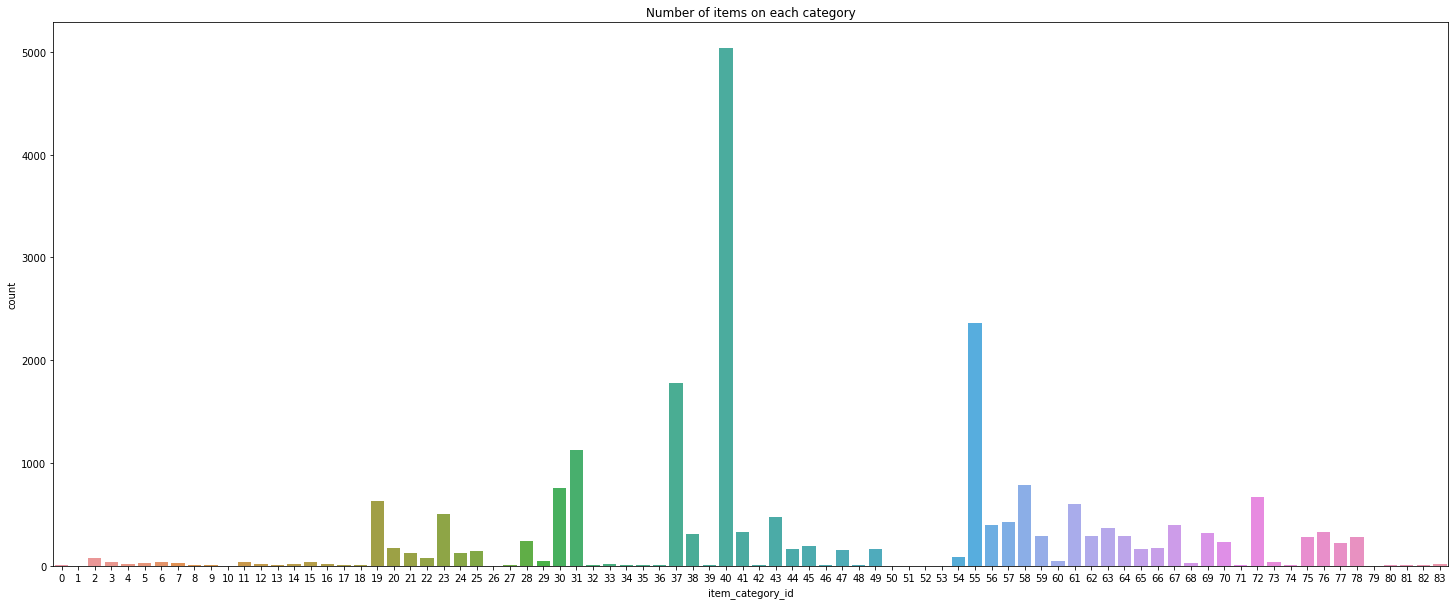

In [15]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(x='item_category_id', data=items)
plt.title('Number of items on each category')

### Shops

In [16]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [17]:
print(len(shops))
print(shops.shop_name.nunique())

60
60


* Let's extract and add city feature to the shops table

In [18]:
shops['city'] = shops['shop_name'].str.extract(r'(\w+\.*\w*)')
shops.loc[shops.city == 'Выездная', 'city'] = 'Выездная торговля'
shops.loc[shops.city == 'РостовНаДону', 'city'] = 'Ростов-На-Дону'
shops.loc[shops.city == 'Сергиев', 'city'] = 'Сергиев Посад'
shops.loc[shops.city == 'Цифровой', 'city'] = 'Интернет'
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [19]:
shops.shop_name

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

* There are several shops with repeated names, so let's combine them

In [20]:
shops.loc[shops.shop_id == 0, 'shop_id'] = 57
shops.loc[shops.shop_id == 1, 'shop_id'] = 58
shops.loc[shops.shop_id == 10, 'shop_id'] = 11

Text(0.5, 1.0, 'Number of shops in each city')

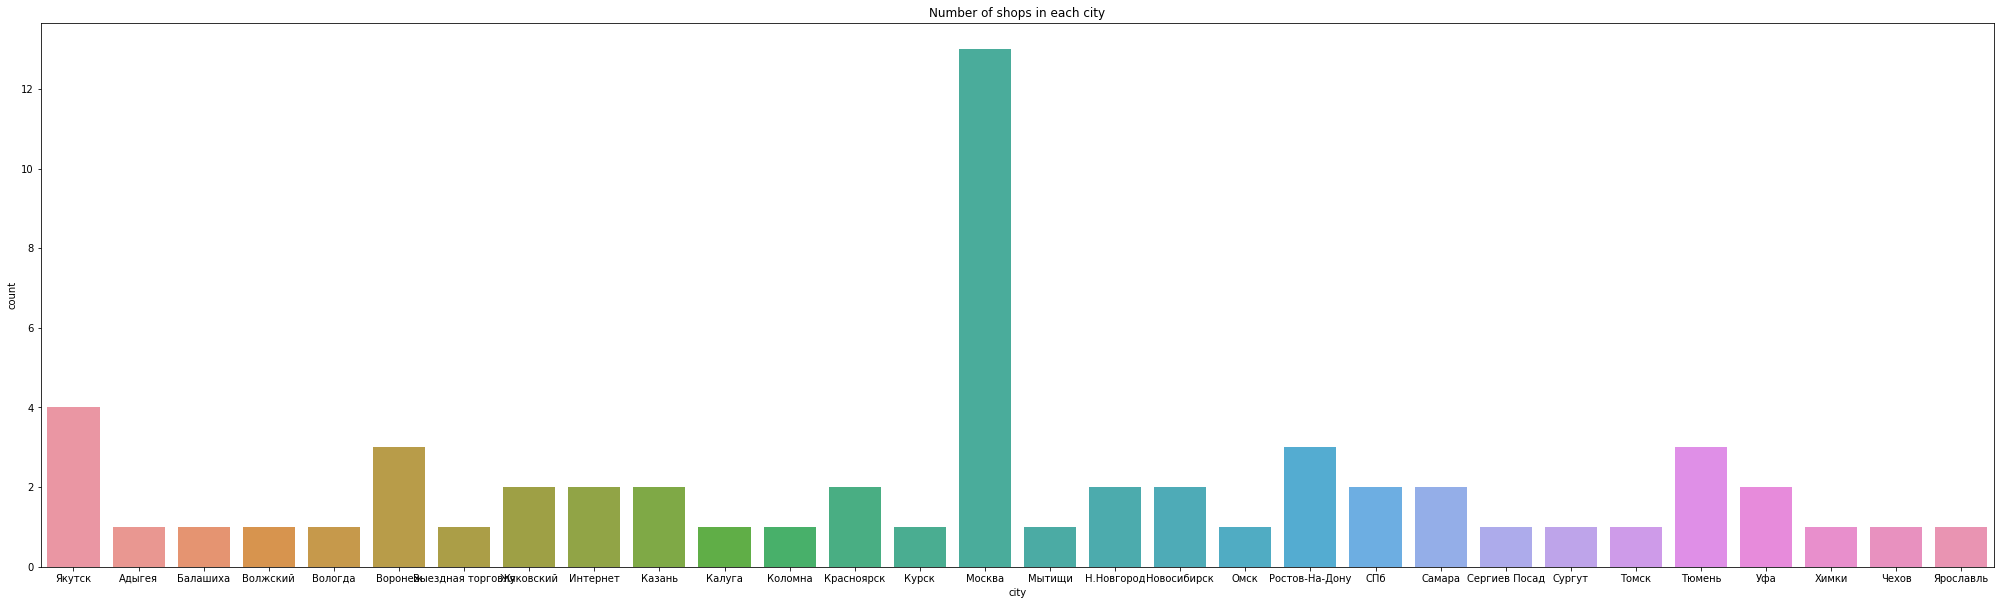

In [21]:
fig = plt.figure(figsize=(35, 10))
sns.countplot(x='city', data=shops)
plt.title('Number of shops in each city')

### Sales Data

In [22]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [23]:
sales_train.shape

(2935842, 6)

In [24]:
sales_train.date = pd.to_datetime(sales_train.date, format='%d.%m.%Y')

* The task is to predict total sales for the whole next month, so lets aggregate sales on month level

In [25]:
data = sales_train.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day': 'sum', 'item_price': 'mean'})
data.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


* Let's combine all potentialy necessary features in one dataframe

In [26]:
data = data.merge(items, on='item_id')
data = data.merge(item_categories, on='item_category_id')
data = data.merge(shops, on='shop_id')
data.sample(5)

,date_block_num,shop_id,item_id,item_cnt_day,item_price,item_name,item_category_id,item_category_name,item_sub_category,shop_name,city
1098898,2,54,16594,2.0,349.0,ОРДА (2DVD),40,Кино,DVD,"Химки ТЦ ""Мега""",Химки
296740,12,21,16642,1.0,549.0,ОСТРОВ ВЕЗЕНИЯ (BD),37,Кино,Blu-Ray,"Москва МТРЦ ""Афи Молл""",Москва
379302,3,25,9967,1.0,149.0,ВОЗМЕЗДИЕ (BD),37,Кино,Blu-Ray,"Москва ТРК ""Атриум""",Москва
167558,10,15,1937,2.0,599.0,"BioShock Infinite [PC, Jewel, русские субтитры]",30,Игры PC,Стандартные издания,"Калуга ТРЦ ""XXI век""",Калуга
1599331,7,47,2432,1.0,449.0,Crisis Core: Final Fantasy 7 PSP,21,Игры,PSP,"Сургут ТРЦ ""Сити Молл""",Сургут


In [27]:
data.shape

(1684401, 11)

* Total sales in each month

Text(0.5, 1.0, 'Month total sales')

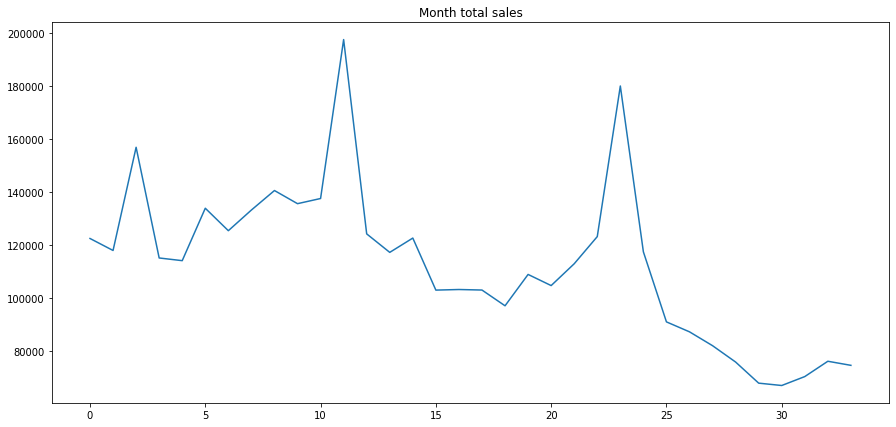

In [28]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data.groupby(['date_block_num'])['item_cnt_day'].sum())
plt.title('Month total sales')

Text(0.5, 1.0, 'Each item total sales')

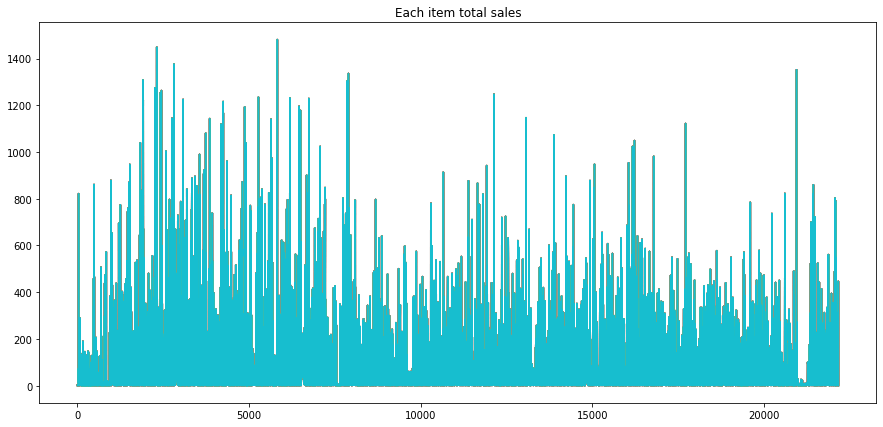

In [29]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data.groupby(['item_id']).count())
plt.title('Each item total sales')

* Let's check last sale date at each shop and of each item and decide whether it's closed/outdated or not

In [30]:
last_shop = pd.DataFrame(sales_train.groupby('shop_id')['date'].max()).sort_values('date').reset_index()
last_shop[last_shop.date <= pd.Timestamp(2015, 6, 30)]

,shop_id,date
0,0,2013-02-28
1,1,2013-02-28
2,8,2013-04-01
3,23,2013-04-28
4,32,2013-07-03
5,13,2014-08-09
6,17,2015-01-18
7,43,2015-01-25
8,40,2015-01-29
9,30,2015-02-18


In [31]:
last_item = pd.DataFrame(sales_train.groupby('item_id')['date'].max()).sort_values('date').reset_index()
last_item

,item_id,date
0,6469,2013-01-01
1,3766,2013-01-01
2,9777,2013-01-01
3,20481,2013-01-01
4,9685,2013-01-01
...,...,...
21802,20629,2015-10-31
21803,3920,2015-10-31
21804,7187,2015-10-31
21805,13645,2015-10-31


In [32]:
not_sold = pd.DataFrame(data.groupby(['item_id', 'shop_id'])['item_cnt_day'].sum()).reset_index()
not_sold = not_sold[not_sold.item_cnt_day == 0]
not_sold.shape

(26, 3)

In [33]:
items.shape

(22170, 3)

* There are some items that weren't sold at all

In [34]:
not_sold_items = pd.DataFrame(pd.concat([last_item.item_id, items.item_id]).drop_duplicates(keep=False))
not_sold_items

,item_id
83,83
140,140
168,168
173,173
204,204
...,...
21974,21974
21975,21975
22022,22022
22035,22035


* Let's check whether these items are present it test set

In [35]:
not_sold_items.merge(test.item_id.drop_duplicates(), how ='inner', on='item_id')

,item_id
0,83
1,140
2,168
3,173
4,204
...,...
358,21974
359,21975
360,22022
361,22035


In [51]:
not_sold_items.to_csv('../data/new_items.csv', index=False)

### Seasonality

* Let's check the sales of each item in autumn

In [36]:
autumn = data[data.date_block_num.isin([8,9,10,20,21,22,32,33])]
not_autumn = pd.concat([data, autumn]).drop_duplicates(keep=False)
print((len(data), len(autumn), len(not_autumn)))

(1684401, 362829, 1321572)


In [37]:
diff = pd.DataFrame(pd.concat([not_autumn.item_id.drop_duplicates(), autumn.item_id.drop_duplicates()]).drop_duplicates(keep=False))
autumn = diff.merge(autumn.item_id.drop_duplicates(), how ='inner', on='item_id')
autumn

,item_id
0,14801
1,14808
2,18742
3,20263
4,17409
...,...
1274,5386
1275,4931
1276,13091
1277,13094


In [50]:
autumn.to_csv('../data/autumn.csv', index=False)

In [38]:
temp = data[data.date_block_num.isin([8,9,10,20,21,22,32,33])]['item_id'].drop_duplicates()
not_autumn = pd.DataFrame(pd.concat([temp, data.item_id.drop_duplicates()]).drop_duplicates(keep=False))
not_autumn

,item_id
11,98
74,9043
94,9618
96,9804
124,10106
...,...
1684360,3638
1684361,4729
1684362,7921
1684363,3872


* autumn - items sold only in autumn
* not_autumn - items not sold in autumn at all

* Let's check whether these items are present it test set

In [39]:
not_autumn.merge(test.item_id.drop_duplicates(), how ='inner', on='item_id')

,item_id
0,20126
1,16910
2,11074
3,17152
4,701
...,...
116,3414
117,3231
118,19442
119,19427


In [49]:
not_autumn.to_csv('../data/not_autumn.csv', index=False)

### Total sales on each category, shop, city

* Category

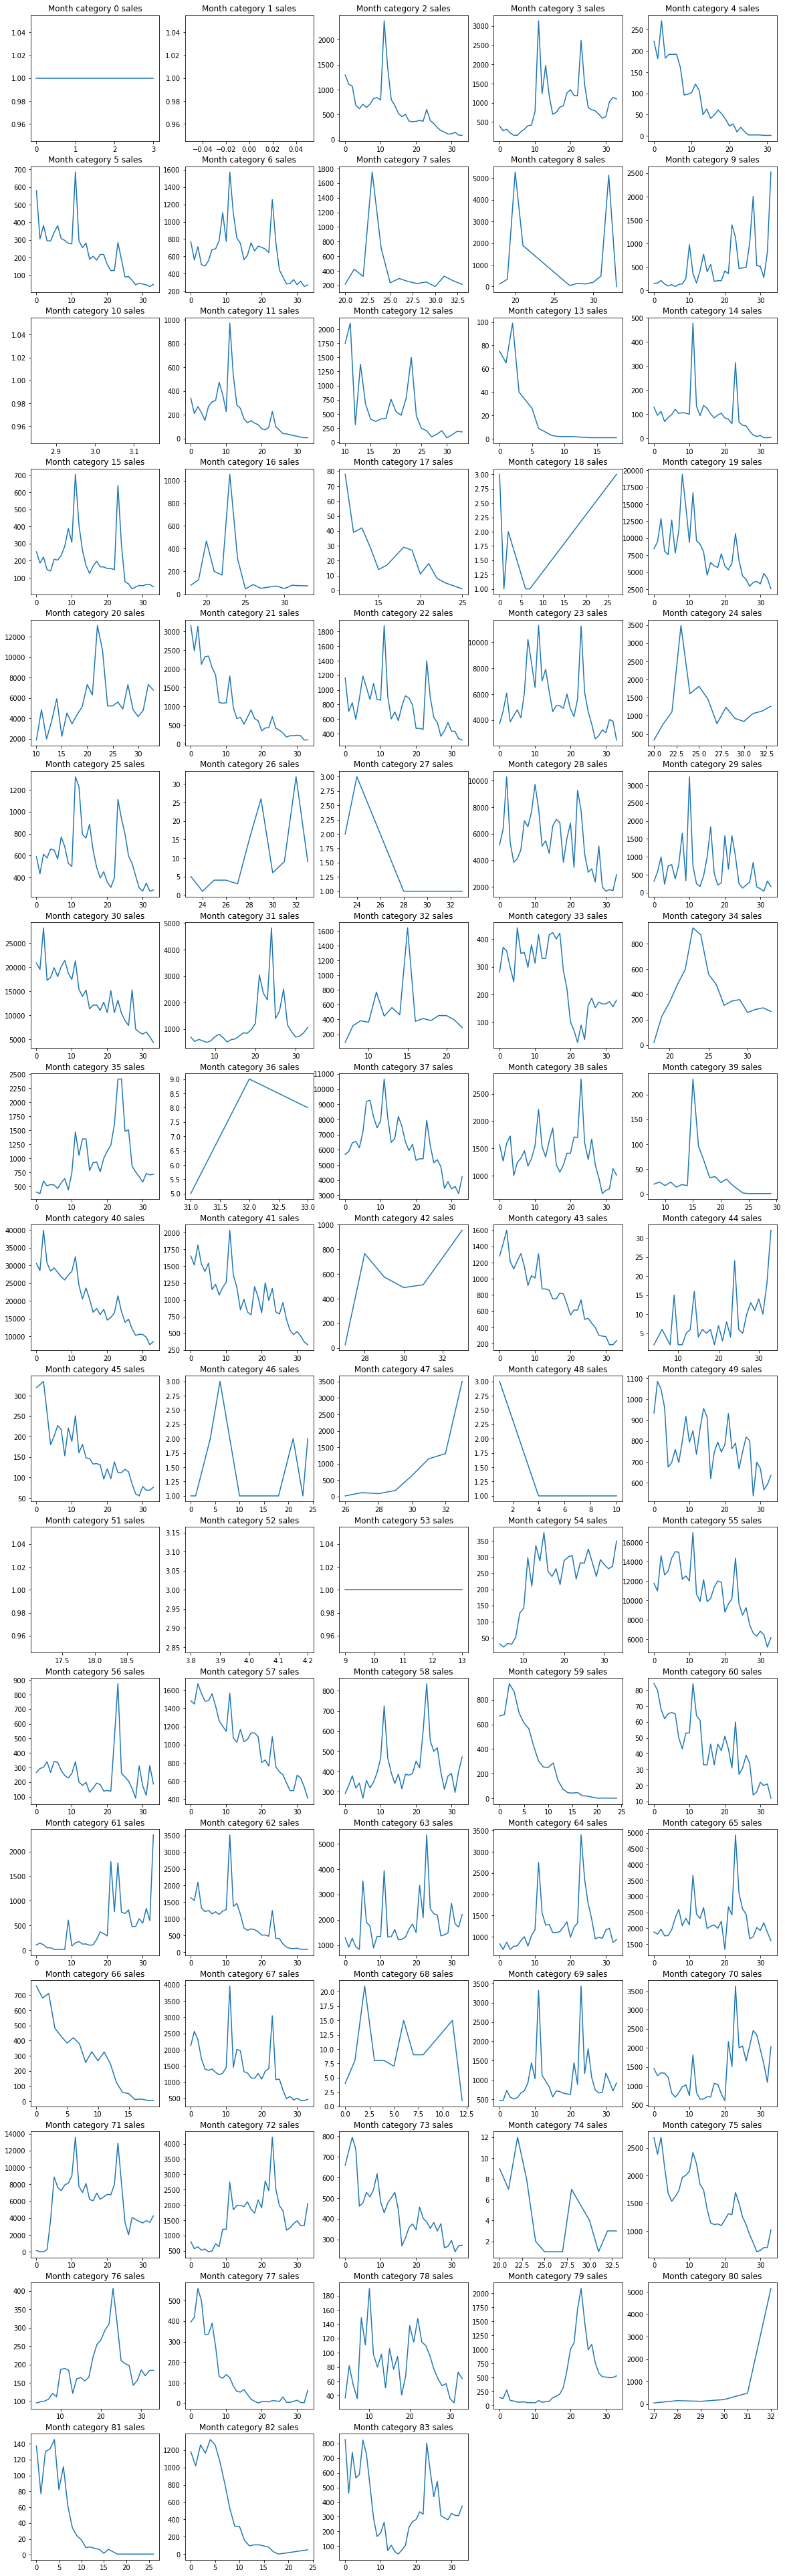

In [40]:
cats = list(data.item_category_id.unique())
cats.sort()

fig = plt.figure(figsize=(20, 70))
for i in range(len(cats)):
    plt.subplot(17, 5, i + 1)
    plt.plot(data[data.item_category_id == cats[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Month category {} sales'.format(cats[i]))

* Shops

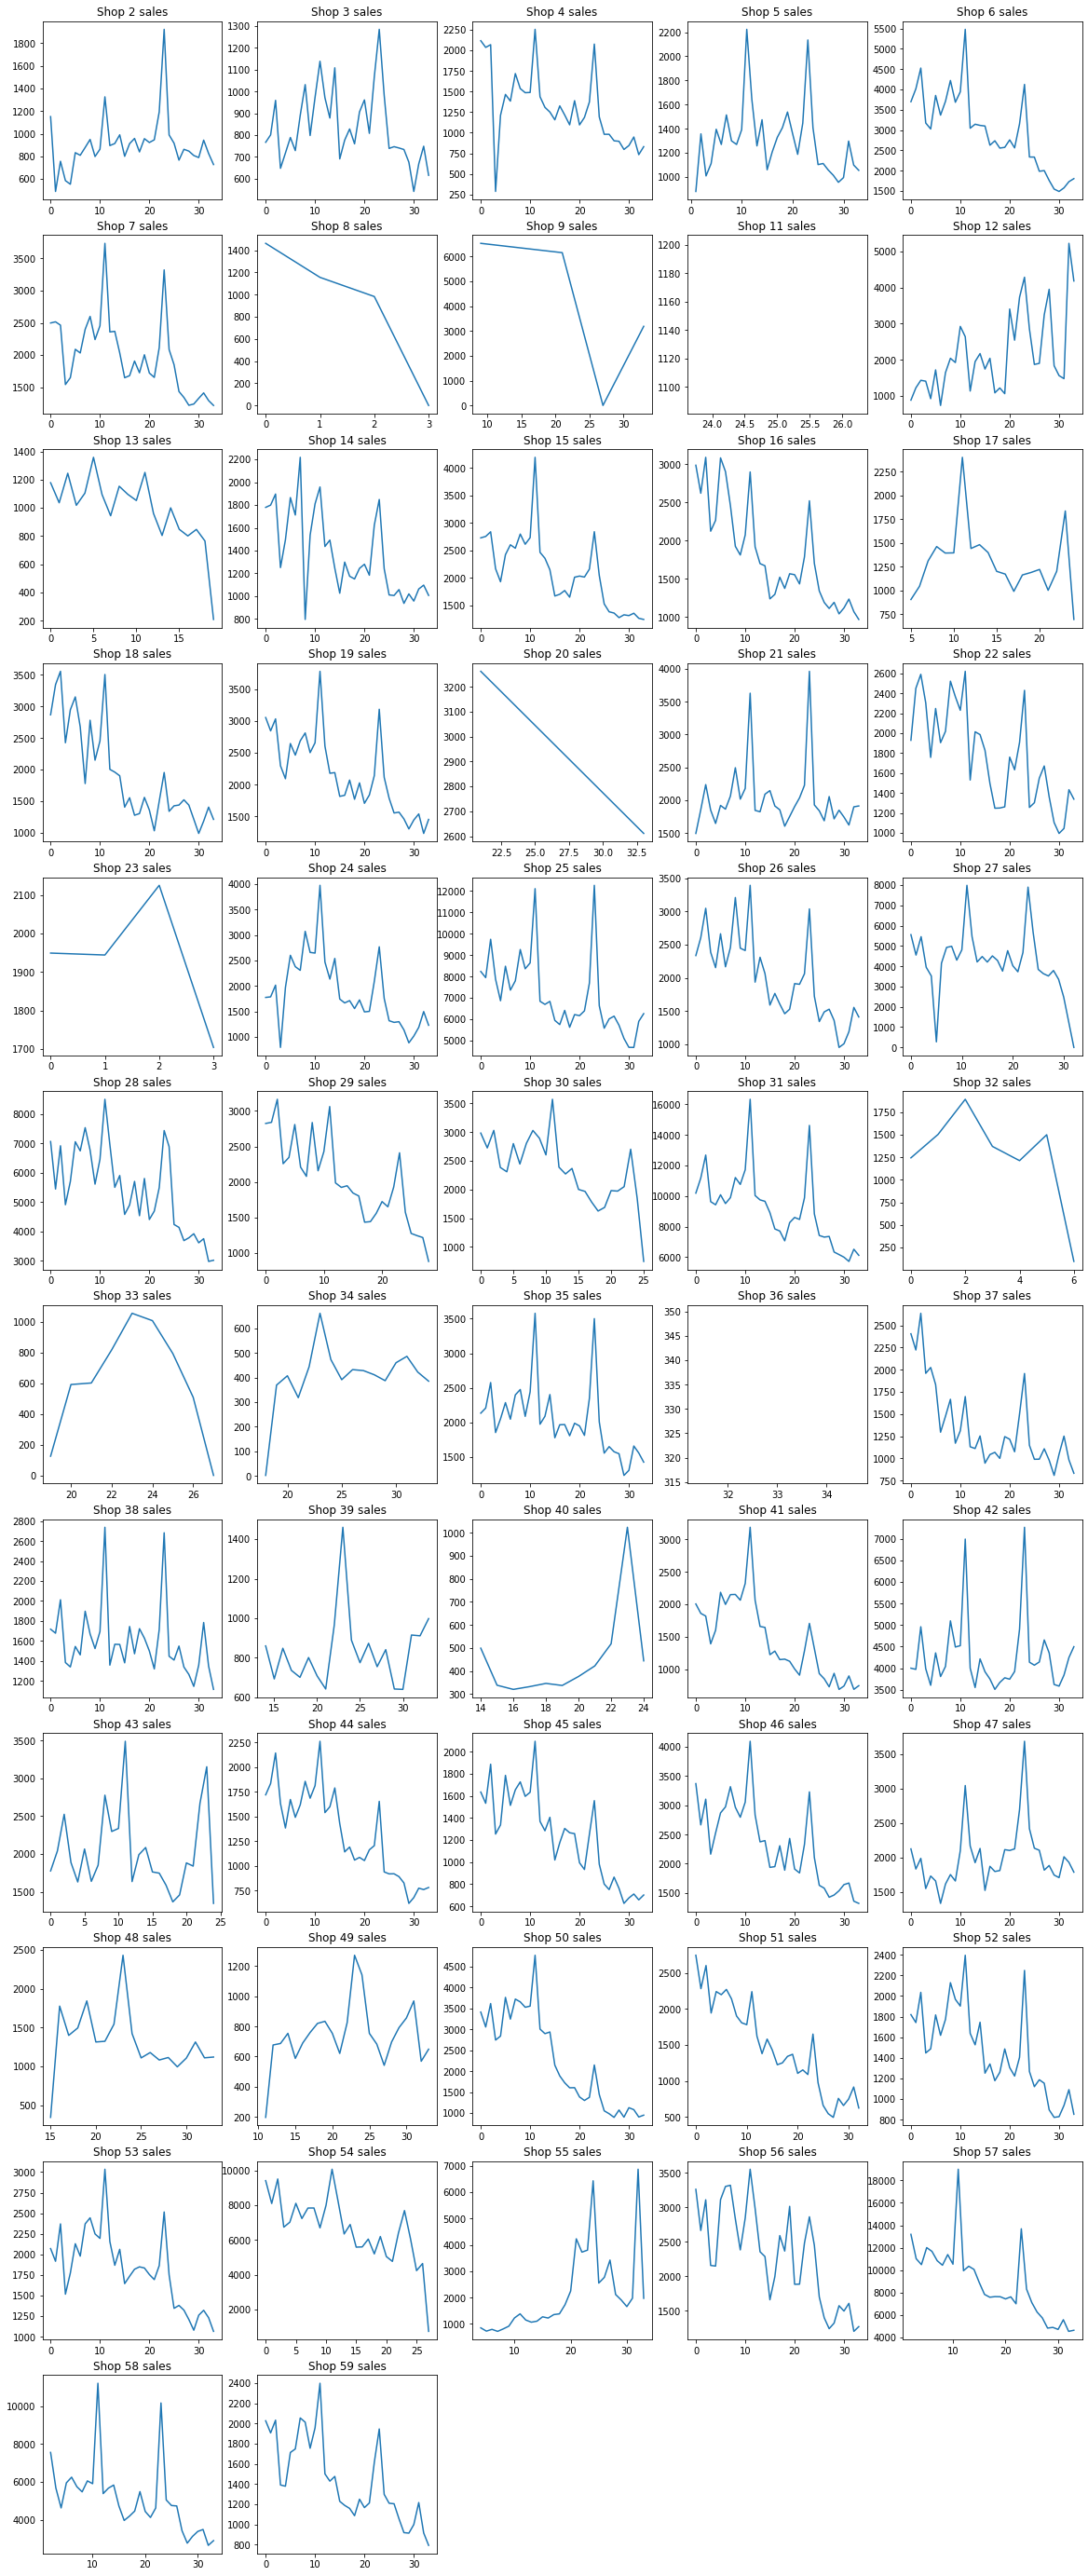

In [41]:
shps = list(data.shop_id.unique())
shps.sort()

fig = plt.figure(figsize=(20, 50))
for i in range(len(shps)):
    plt.subplot(12, 5, i + 1)
    plt.plot(data[data.shop_id == shps[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Shop {} sales'.format(shps[i]))

* Cities

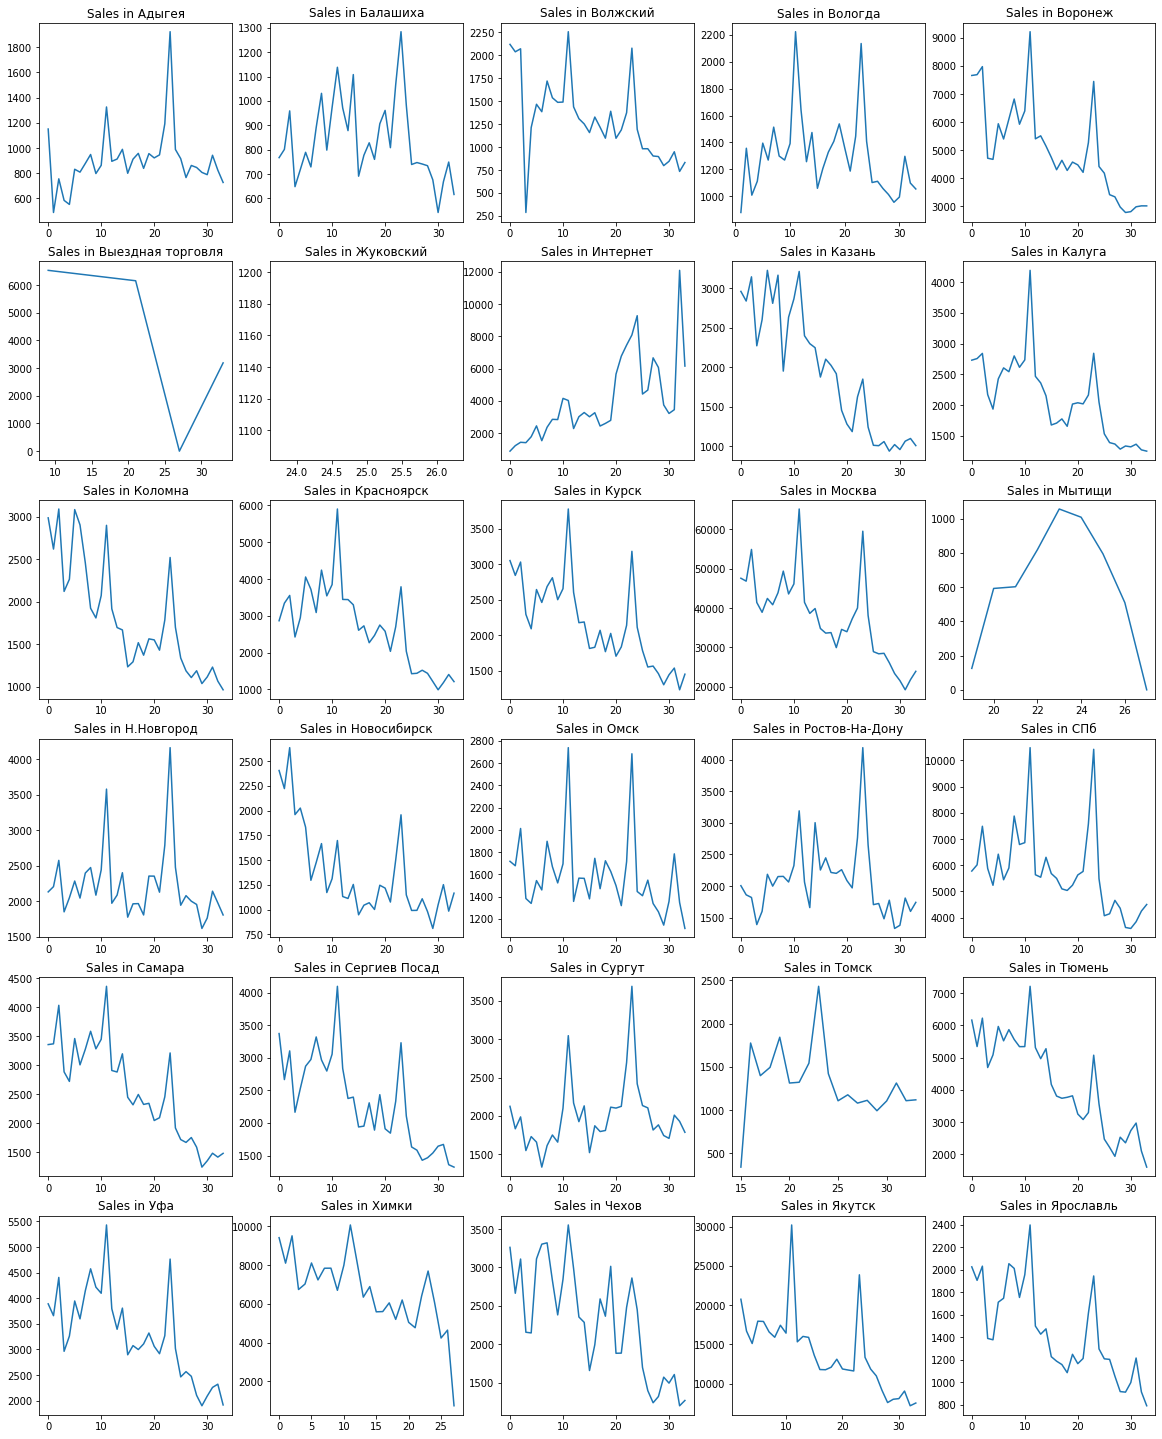

In [42]:
cities = list(data.city.unique())
cities.sort()

fig = plt.figure(figsize=(20, 30))
for i in range(len(cities)):
    plt.subplot(7, 5, i + 1)
    plt.plot(data[data.city == cities[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Sales in {}'.format(cities[i]))

* Let's examine how did the price change in each category

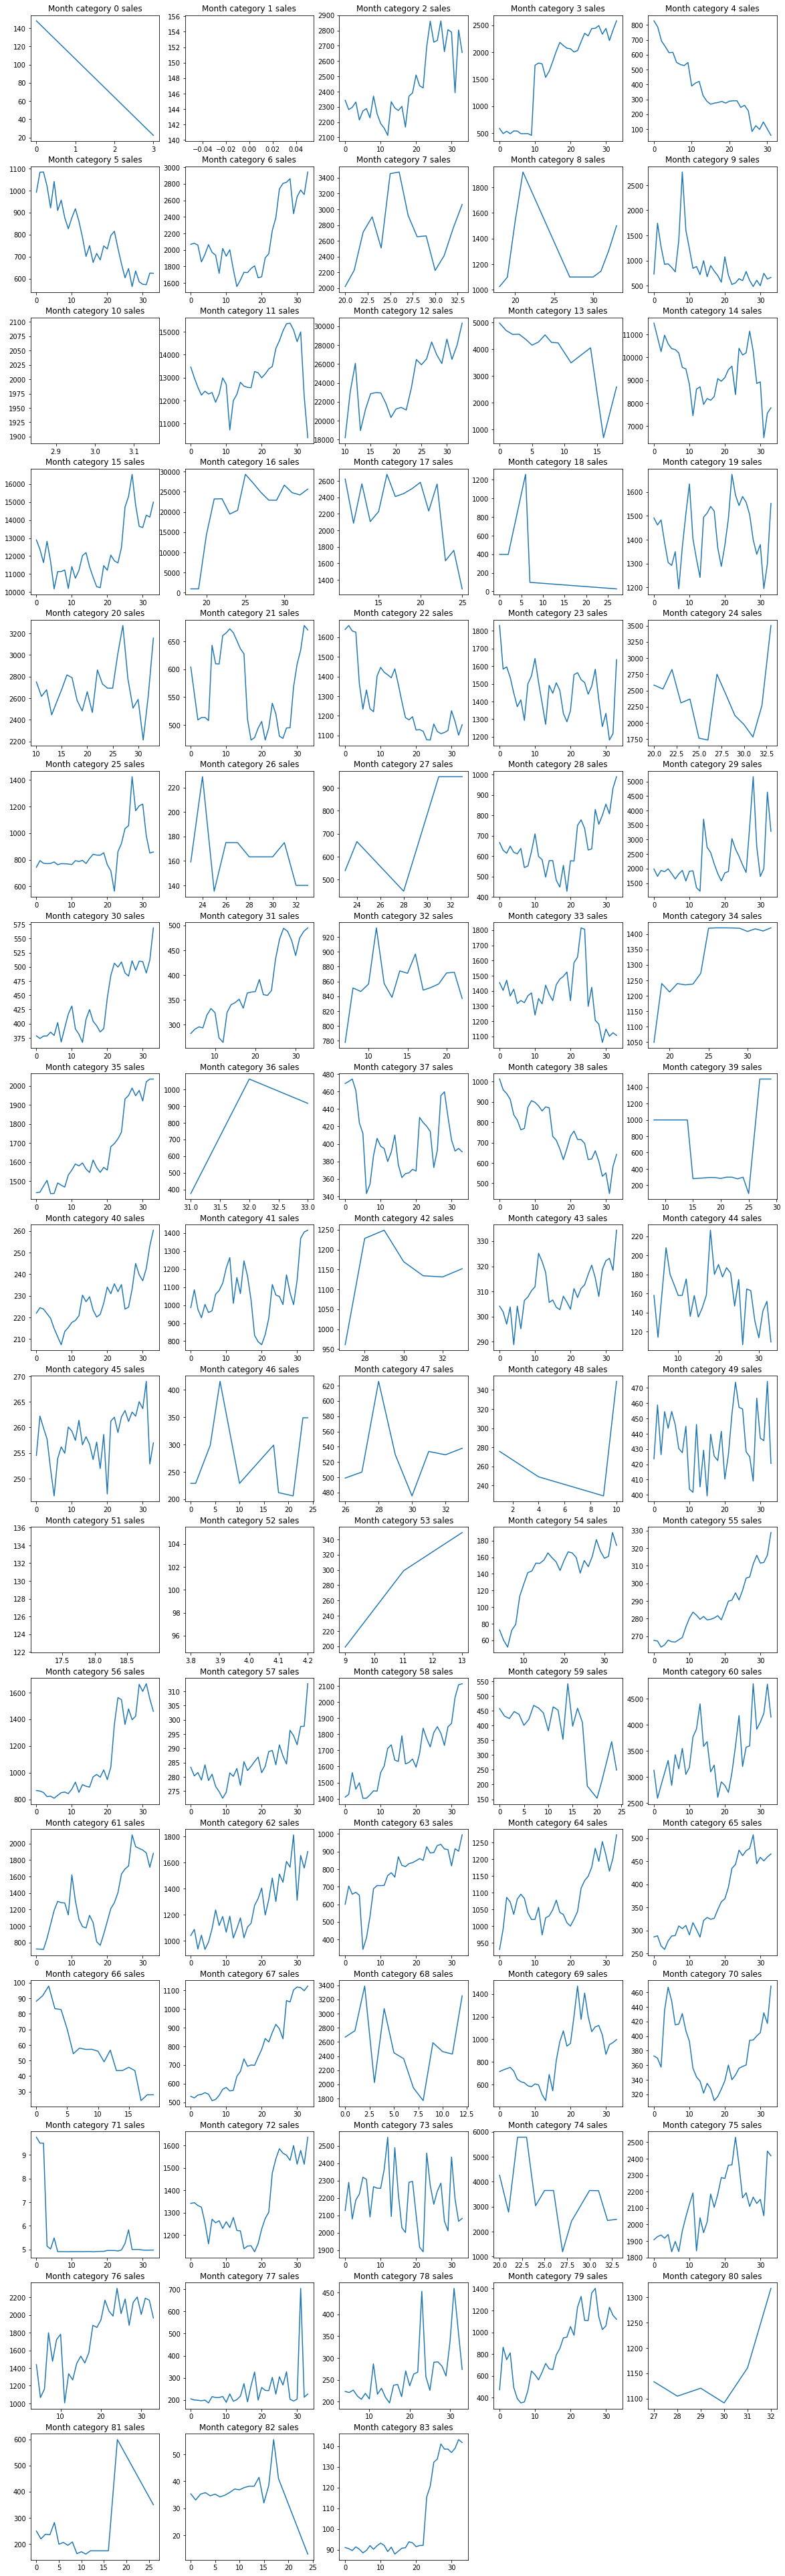

In [43]:
fig = plt.figure(figsize=(20, 70))
for i in range(len(cats)):
    plt.subplot(17, 5, i + 1)
    plt.plot(data[data.item_category_id == cats[i]].groupby(['date_block_num'])['item_price'].mean())
    plt.title('Month category {} sales'.format(cats[i]))

* Let's check if there are new items in test set which haven't been sold yet

In [44]:
intersect = pd.merge(test.item_id.drop_duplicates(), data.item_id.drop_duplicates(), how ='inner', on='item_id')
new_items = pd.DataFrame(pd.concat([intersect, pd.DataFrame(test.item_id.drop_duplicates())]).drop_duplicates(keep=False))
new_items

,item_id
1,5320
4,5268
45,5826
64,3538
65,3571
...,...
5030,15033
5050,7572
5054,9030
5061,1867


* These are all items that haven't been sold yet. Well...